# ARIMA in Python End to End

# Worked on it on 24 Aug 2021

In [2]:
# https://www.kaggle.com/rohanrao/nifty50-stock-market-data

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA

In [3]:
df=pd.read_csv("HCLTECH.csv")

In [4]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-11,HCLTECH,EQ,580.00,1550.0,1725.00,1492.00,1560.00,1554.45,1582.72,1192200,1.886915e+14,NaN,NaN,NaN
1,2000-01-12,HCLTECH,EQ,1554.45,1560.0,1678.85,1560.00,1678.85,1678.85,1657.05,344850,5.714349e+13,NaN,NaN,NaN
2,2000-01-13,HCLTECH,EQ,1678.85,1790.0,1813.20,1781.00,1813.20,1813.20,1804.69,53000,9.564880e+12,NaN,NaN,NaN
3,2000-01-14,HCLTECH,EQ,1813.20,1958.3,1958.30,1835.00,1958.30,1958.30,1939.90,270950,5.256169e+13,NaN,NaN,NaN
4,2000-01-17,HCLTECH,EQ,1958.30,2115.0,2115.00,1801.65,1801.65,1801.65,1990.55,428800,8.535473e+13,NaN,NaN,NaN


In [8]:
# data cleaning

hcldata=df.dropna()

hcldata.index=pd.to_datetime(hcldata["Date"])

hcldata=hcldata["Prev Close"]["2013-01-01":"2013-12-02"]

In [10]:
hcldata.describe()

count     230.000000
mean      852.953478
std       156.484472
min       618.700000
25%       736.350000
50%       777.450000
75%      1023.962500
max      1161.150000
Name: Prev Close, dtype: float64

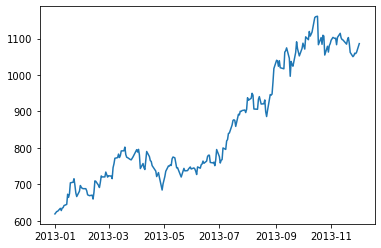

In [11]:
plt.plot(hcldata)

In [12]:
# Checking stationaity

#method1: Rolling statistics
#method2: Duccy fuller test

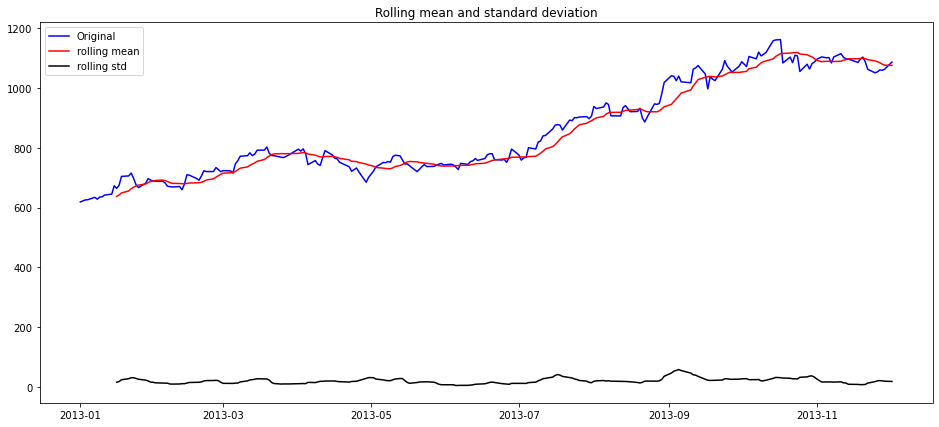

In [13]:
# Determine rolling statistics

rollmean=hcldata.rolling(12).mean()
rollstd=hcldata.rolling(12).std()

plt.figure(figsize=(16,7))
fig=plt.figure(1)

# Plot rolling statistics

orig=plt.plot(hcldata, color="blue", label="Original")
mean=plt.plot(rollmean, color="red", label="rolling mean")
std=plt.plot(rollstd, color="black", label="rolling std")
plt.legend(loc="best")
plt.title("Rolling mean and standard deviation")
plt.show()

In [14]:
# Std is constant but mean is not so not a stationary series

# Making series stationary(in case not, here its not)

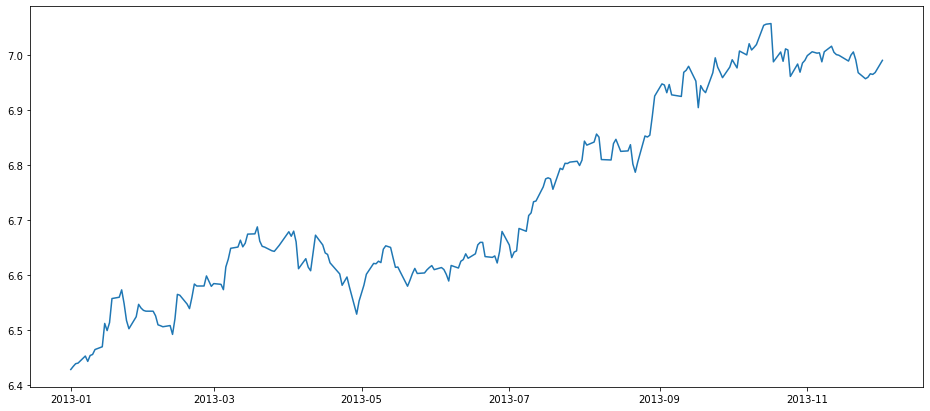

In [16]:
# lets try transformation

plt.figure(figsize=(16,7))
fig=plt.figure(1)

import numpy as np
ts_log=np.log(hcldata)  # try log transformation, we can try square root and square or other too
plt.plot(ts_log)

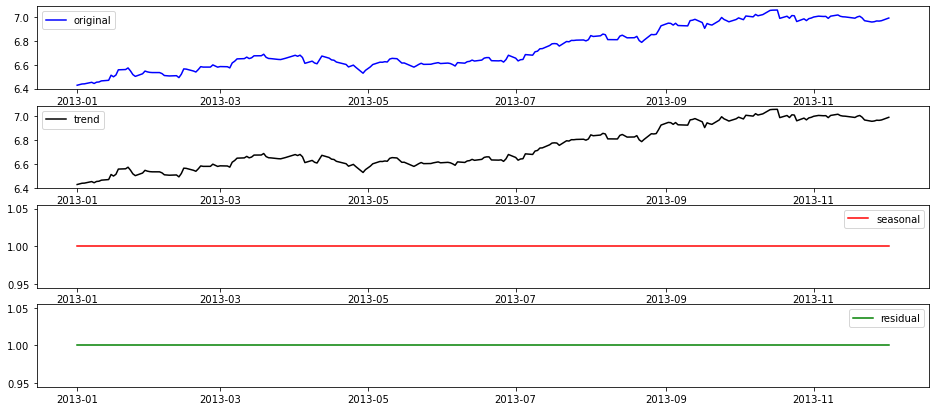

In [21]:
# Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(ts_log, period=1, model="multiplicative")

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.figure(figsize=(16,7))
fig=plt.figure(1)

plt.subplot(411)
plt.plot(ts_log, label="original", color="blue")
plt.legend(loc="best")
plt.subplot(412)
plt.plot(trend, label="trend", color="black")
plt.legend(loc="best")
plt.subplot(413)
plt.plot(seasonal, label="seasonal", color="red")
plt.legend(loc="best")
plt.subplot(414)
plt.plot(residual, label="residual", color="green")
plt.legend(loc="best")



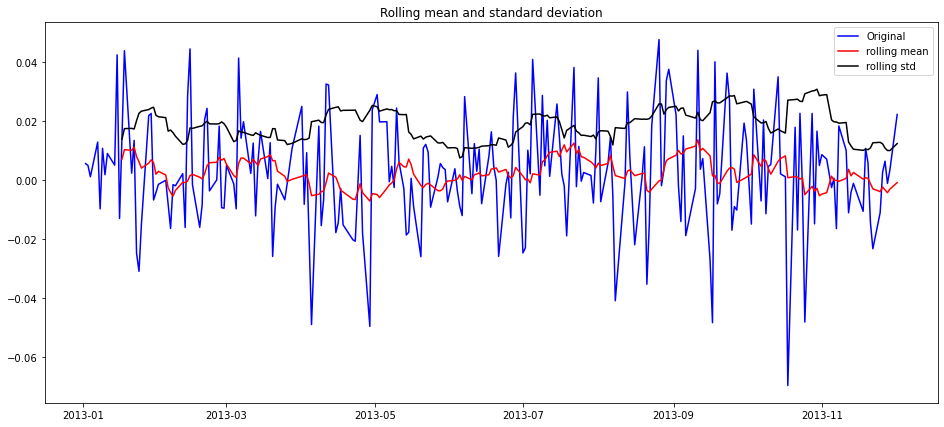

<Figure size 1152x504 with 0 Axes>

In [154]:
# so log transformation seems to be not helping

# lets try differencing

plt.figure(figsize=(16,7))
fig=plt.figure(1)

ts_log_diff=ts_log-ts_log.shift()

# Determine rolling statistics

rollmean=ts_log_diff.rolling(12).mean()
rollstd=ts_log_diff.rolling(12).std()

plt.figure(figsize=(16,7))
fig=plt.figure(1)

# Plot rolling statistics

orig=plt.plot(ts_log_diff, color="blue", label="Original")
mean=plt.plot(rollmean, color="red", label="rolling mean")
std=plt.plot(rollstd, color="black", label="rolling std")
plt.legend(loc="best")
plt.title("Rolling mean and standard deviation")
plt.show()

In [23]:
# This looks like stationary series now

In [24]:
# Run Acf and pacf now

In [25]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(ts_log_diff, nlags=20)
lag_pacf=pacf(ts_log_diff, nlags=20)

C:\Users\sagarw39\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


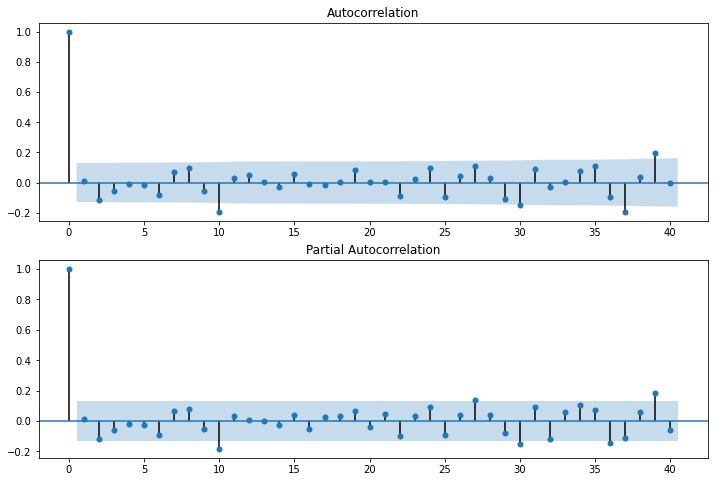

In [94]:
import statsmodels.api as sm
fig= plt.figure(figsize=(12,8))
ax1= fig.add_subplot(211)
fig= sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax=ax1)
ax2= fig.add_subplot(212)
fig= sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40,ax=ax2)

In [95]:
# select order o Ar 2 as 2 is the first time touching shaded part

In [96]:
from statsmodels.tsa.arima_model import ARIMA

In [156]:
ts_log_diff["2013-01-01"]=0.005561

In [157]:
ts_log_diff

Date
2013-01-01    0.005561
2013-01-02    0.005561
2013-01-03    0.004970
2013-01-04    0.001119
2013-01-07    0.012857
                ...   
2013-11-26    0.002615
2013-11-27    0.006390
2013-11-28   -0.001133
2013-11-29    0.003395
2013-12-02    0.022206
Name: Prev Close, Length: 230, dtype: float64

In [201]:
model1= ARIMA(ts_log_diff, order=(2,1,2))
results_arima=model1.fit()

C:\Users\sagarw39\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sagarw39\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sagarw39\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


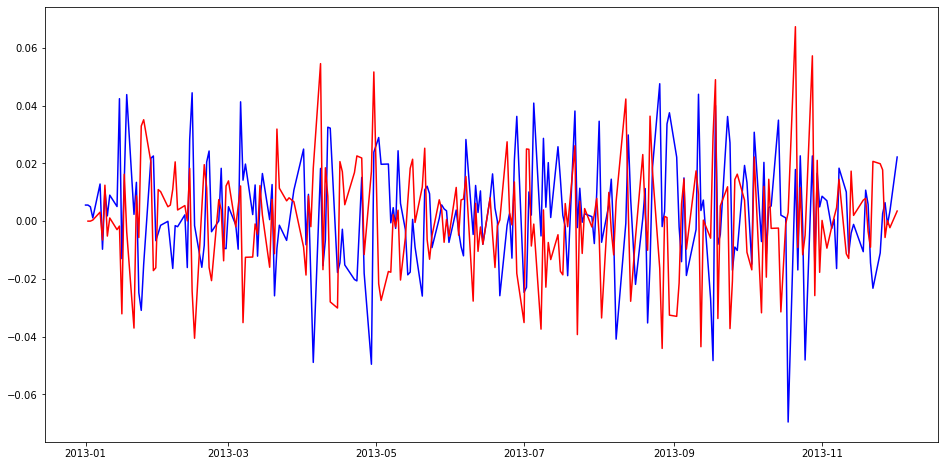

In [202]:
fig= plt.figure(figsize=(16,8))
#model= ARIMA(ts_log, order=(2,1,2))
#results_arima=model.fit(disp=-1)
plt.plot(ts_log_diff, color="blue")
plt.plot(results_arima.fittedvalues, color="red")

# Taking results back to original scale

In [203]:
ARIMA_diff_predictions=pd.Series(results_arima.fittedvalues, copy=True)

In [204]:
print(ARIMA_diff_predictions.head())

Date
2013-01-02   -0.000006
2013-01-03   -0.000009
2013-01-04    0.000372
2013-01-07    0.003104
2013-01-08   -0.006566
dtype: float64


In [205]:
# cumulative sum as we toook differnce

ARIMA_diff_predictions_cumsum=ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())


Date
2013-01-02   -0.000006
2013-01-03   -0.000015
2013-01-04    0.000357
2013-01-07    0.003461
2013-01-08   -0.003105
dtype: float64


In [206]:
# log and adding to compensate differncing

ARIMA_log_predictions=pd.Series(ts_log.iloc[0],index=ts_log.index)
ARIMA_log_predictions=ARIMA_log_predictions.add(ARIMA_diff_predictions_cumsum, fill_value=0)
ARIMA_log_predictions.head()

Date
2013-01-01    6.427621
2013-01-02    6.427614
2013-01-03    6.427605
2013-01-04    6.427977
2013-01-07    6.431082
dtype: float64

In [207]:
prediction_ARIMA=np.exp(ARIMA_log_predictions)

In [208]:
hcldata1,prediction_ARIMA

(Date
 2013-01-02     622.15
 2013-01-03     625.25
 2013-01-04     625.95
 2013-01-07     634.05
 2013-01-08     627.90
                ...   
 2013-11-26    1053.00
 2013-11-27    1059.75
 2013-11-28    1058.55
 2013-11-29    1062.15
 2013-12-02    1086.00
 Name: Prev Close, Length: 229, dtype: float64,
 Date
 2013-01-01    618.700000
 2013-01-02    618.696190
 2013-01-03    618.690645
 2013-01-04    618.920825
 2013-01-07    620.845199
                  ...    
 2013-11-26    676.599858
 2013-11-27    672.769113
 2013-11-28    672.918940
 2013-11-29    671.383471
 2013-12-02    673.732931
 Length: 230, dtype: float64)

Text(0.5, 1.0, 'RMSE: 190.46420669339523')

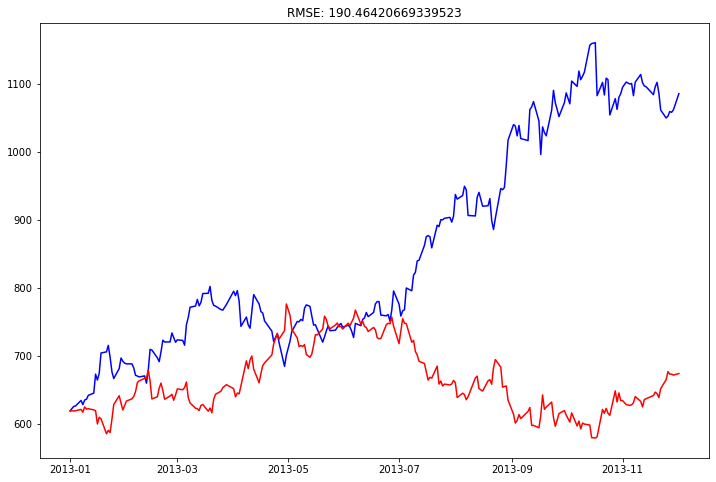

In [209]:
# exponential is reverse of log as we did log during transformation

plt.figure(figsize=(12,8))
prediction_ARIMA=np.exp(ARIMA_log_predictions)
plt.plot(hcldata, color="blue", label="original")
plt.plot(prediction_ARIMA, color="red", label="predictions")
plt.title("RMSE: {}".format(np.sqrt(sum(prediction_ARIMA-hcldata)**2)/len(hcldata)))

In [210]:
prediction_ARIMA

Date
2013-01-01    618.700000
2013-01-02    618.696190
2013-01-03    618.690645
2013-01-04    618.920825
2013-01-07    620.845199
                 ...    
2013-11-26    676.599858
2013-11-27    672.769113
2013-11-28    672.918940
2013-11-29    671.383471
2013-12-02    673.732931
Length: 230, dtype: float64

In [211]:
# capturing trend but not ups and downs

In [212]:
results_arima.predict(10,20)

Date
2013-01-15   -0.001720
2013-01-16   -0.032137
2013-01-17    0.016227
2013-01-18   -0.003736
2013-01-21   -0.037065
2013-01-22    0.008779
2013-01-23   -0.005694
2013-01-24    0.032956
2013-01-25    0.035132
2013-01-28    0.020400
2013-01-29   -0.017151
dtype: float64

In [213]:
# Auto ARIMA for hyper parametering turing

import pmdarima as pm

ModuleNotFoundError: No module named 'pmdarima'